In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid", context="talk")
plt.rcParams['font.family'] = 'sans-serif'

print("="*60)
print("GENERATING DDM RESULTS VISUALIZATIONS")
print("="*60)

# Load DDM Results
try:
    df_ddm = pd.read_csv('../outputs/models/ml_comparison_DDM.csv')
    print(f"\n✅ Loaded DDM results: {df_ddm.shape}")
    print(df_ddm.head())
except FileNotFoundError:
    print("❌ Error: ml_comparison_DDM.csv not found. Run 03_analysis_CORRECTED.ipynb first.")
    raise

GENERATING DDM RESULTS VISUALIZATIONS

✅ Loaded DDM results: (2, 16)
                 model  subject_accuracy  video_accuracy  loo_accuracy  \
0  DDM - Concatenation          0.516908        0.026570      0.516908   
1     DDM - Reactivity          0.205314        0.050725      0.205314   

   chance_level_subject  chance_level_video  separation_ratio   cohen_d  \
0              0.043478            0.055556          1.655736  0.252861   
1              0.043478            0.055556          1.060180  0.040515   

   n_features  p_value_subject  p_value_video  p_value_distance  \
0          20    7.328029e-173       0.998419      2.159983e-50   
1          20     8.915814e-33       0.696139      2.254090e-03   

   same_subj_same_vid  same_subj_diff_vid  diff_subj_same_vid  \
0                   0                 214                  11   
1                   0                  85                  21   

   diff_subj_diff_vid  
0                 189  
1                 308  


## Plot 1: Subject vs Video Accuracy Comparison


✅ Saved: ddm_accuracy_comparison.png


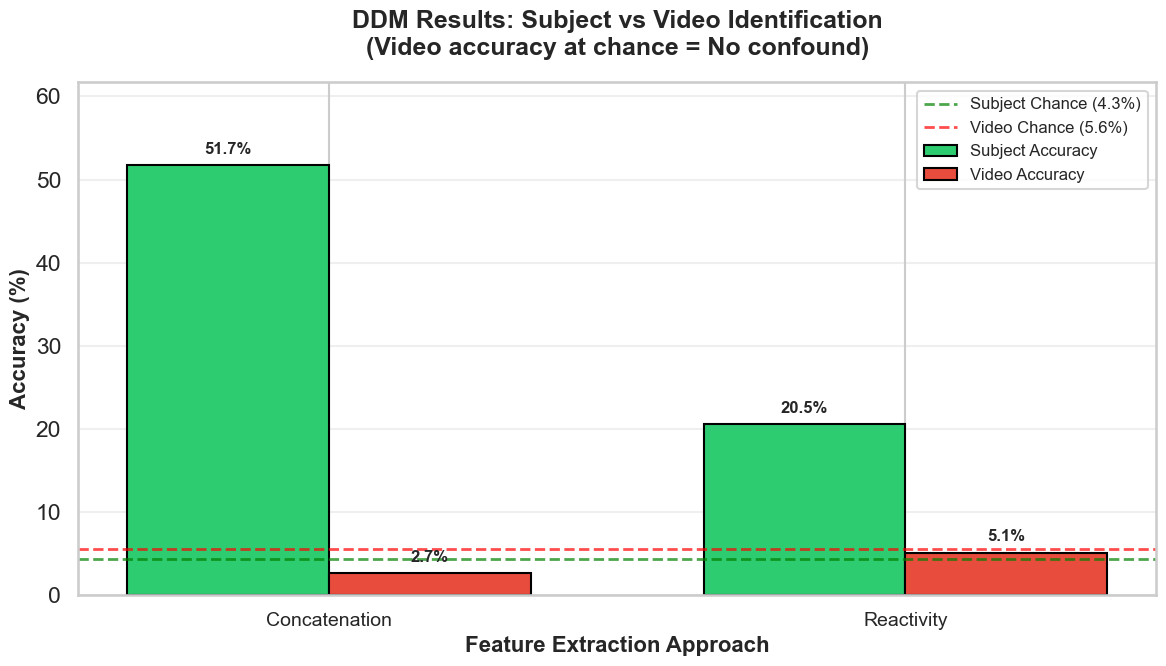

In [5]:
fig, ax = plt.subplots(figsize=(12, 7))

# Prepare data
approaches = ['Concatenation', 'Reactivity']
subject_acc = df_ddm['subject_accuracy'].values * 100
video_acc = df_ddm['video_accuracy'].values * 100
chance_subject = df_ddm['chance_level_subject'].iloc[0] * 100
chance_video = df_ddm['chance_level_video'].iloc[0] * 100

x = np.arange(len(approaches))
width = 0.35

# Bars
bars1 = ax.bar(x - width/2, subject_acc, width, label='Subject Accuracy', 
               color='#2ecc71', edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, video_acc, width, label='Video Accuracy', 
               color='#e74c3c', edgecolor='black', linewidth=1.5)

# Chance lines
ax.axhline(y=chance_subject, color='green', linestyle='--', linewidth=2, 
           alpha=0.7, label=f'Subject Chance ({chance_subject:.1f}%)')
ax.axhline(y=chance_video, color='red', linestyle='--', linewidth=2, 
           alpha=0.7, label=f'Video Chance ({chance_video:.1f}%)')

# Labels and formatting
ax.set_ylabel('Accuracy (%)', fontsize=16, fontweight='bold')
ax.set_xlabel('Feature Extraction Approach', fontsize=16, fontweight='bold')
ax.set_title('DDM Results: Subject vs Video Identification\n(Video accuracy at chance = No confound)', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(approaches, fontsize=14)
ax.legend(fontsize=12, loc='upper right')
ax.set_ylim(0, max(subject_acc) + 10)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom', 
                fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/plots/ddm_accuracy_comparison.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: ddm_accuracy_comparison.png")
plt.show()

## Plot 2: Separation Ratio & Cohen's d

✅ Saved: ddm_separation_metrics.png


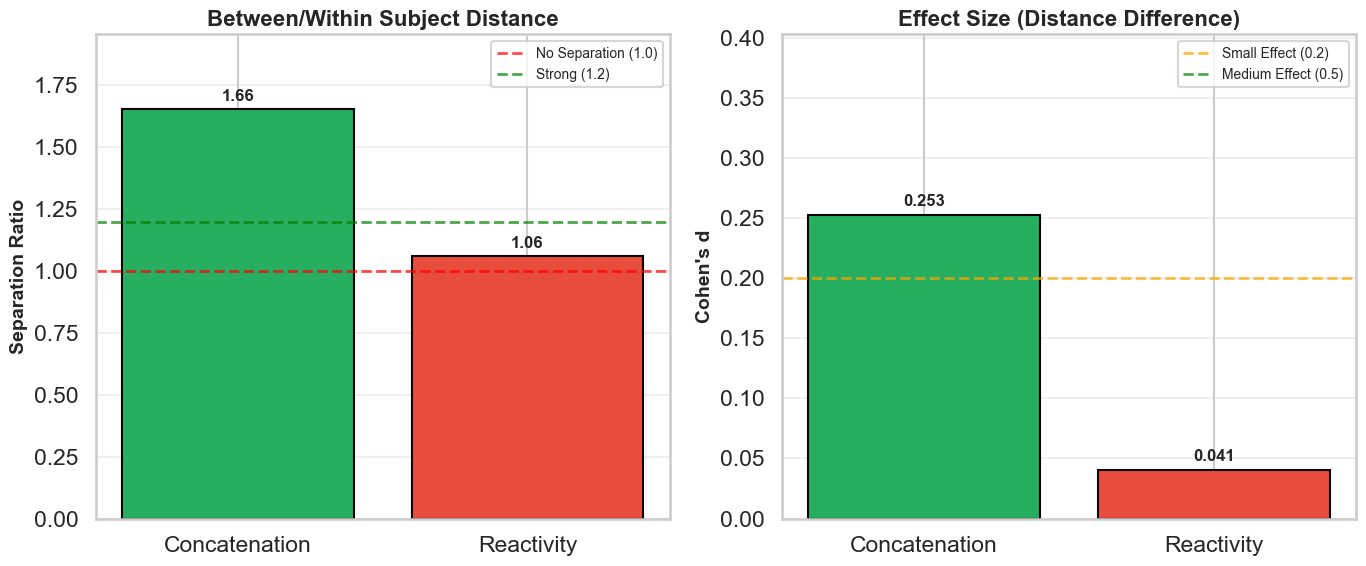

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Separation Ratio
sep_ratios = df_ddm['separation_ratio'].values
colors_sep = ['#27ae60' if r > 1.2 else '#f39c12' if r > 1.1 else '#e74c3c' for r in sep_ratios]

bars_sep = ax1.bar(approaches, sep_ratios, color=colors_sep, edgecolor='black', linewidth=1.5)
ax1.axhline(y=1.0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='No Separation (1.0)')
ax1.axhline(y=1.2, color='green', linestyle='--', linewidth=2, alpha=0.7, label='Strong (1.2)')
ax1.set_ylabel('Separation Ratio', fontsize=14, fontweight='bold')
ax1.set_title('Between/Within Subject Distance', fontsize=16, fontweight='bold')
ax1.legend(fontsize=10)
ax1.set_ylim(0, max(sep_ratios) + 0.3)
ax1.grid(axis='y', alpha=0.3)

for bar in bars_sep:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{height:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Cohen's d
cohens_d = df_ddm['cohen_d'].values
colors_d = ['#27ae60' if d > 0.2 else '#e74c3c' for d in cohens_d]

bars_d = ax2.bar(approaches, cohens_d, color=colors_d, edgecolor='black', linewidth=1.5)
ax2.axhline(y=0.2, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Small Effect (0.2)')
ax2.axhline(y=0.5, color='green', linestyle='--', linewidth=2, alpha=0.7, label='Medium Effect (0.5)')
ax2.set_ylabel("Cohen's d", fontsize=14, fontweight='bold')
ax2.set_title('Effect Size (Distance Difference)', fontsize=16, fontweight='bold')
ax2.legend(fontsize=10)
ax2.set_ylim(0, max(cohens_d) + 0.15)
ax2.grid(axis='y', alpha=0.3)

for bar in bars_d:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{height:.3f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/plots/ddm_separation_metrics.png', dpi=300, bbox_inches='tight')
print("✅ Saved: ddm_separation_metrics.png")
plt.show()

## Plot 3: Nearest Neighbor Breakdown

✅ Saved: ddm_neighbor_breakdown.png


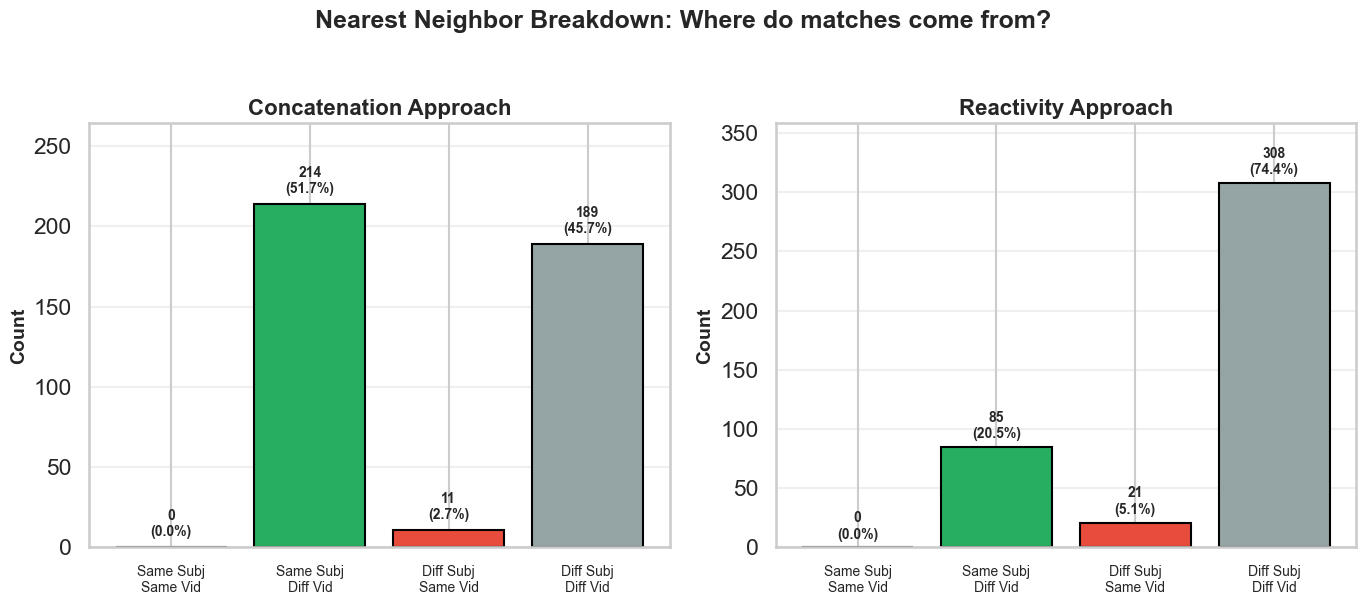

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

categories = ['Same Subj\nSame Vid', 'Same Subj\nDiff Vid', 'Diff Subj\nSame Vid', 'Diff Subj\nDiff Vid']
colors_cat = ['#95a5a6', '#27ae60', '#e74c3c', '#95a5a6']

for idx, approach in enumerate(approaches):
    ax = axes[idx]
    row = df_ddm.iloc[idx]
    
    values = [
        row['same_subj_same_vid'],
        row['same_subj_diff_vid'],
        row['diff_subj_same_vid'],
        row['diff_subj_diff_vid']
    ]
    
    bars = ax.bar(range(len(categories)), values, color=colors_cat, edgecolor='black', linewidth=1.5)
    ax.set_title(f'{approach} Approach', fontsize=16, fontweight='bold')
    ax.set_ylabel('Count', fontsize=14, fontweight='bold')
    ax.set_xticks(range(len(categories)))
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_ylim(0, max(values) + 50)
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{val}\n({val/414*100:.1f}%)', ha='center', va='bottom', 
                fontsize=10, fontweight='bold')

plt.suptitle('Nearest Neighbor Breakdown: Where do matches come from?', 
             fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../outputs/plots/ddm_neighbor_breakdown.png', dpi=300, bbox_inches='tight')
print("✅ Saved: ddm_neighbor_breakdown.png")
plt.show()
